I always like to import the libraries in the alphabetical order so that is it easy to review when needed

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Importing and exploring the dataset

In [20]:
data = pd.read_csv("/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv")
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [21]:
#extracting the data of canada
Canada = data[data["Country"] == "Canada"]
Canada.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1130116,North America,Canada,NaN,Calgary,1,1,1995,12.6
1130117,North America,Canada,NaN,Calgary,1,2,1995,4.5
1130118,North America,Canada,NaN,Calgary,1,3,1995,2.5
1130119,North America,Canada,NaN,Calgary,1,4,1995,11.4
1130120,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [23]:
#counting the repitation of each city in the table to select the max one
Canada["City"].value_counts()

Regina       9266
Quebec       9265
Edmonton     7396
Ottawa       7101
Toronto      7101
Vancouver    7101
Halifax      7101
Winnipeg     7101
Calgary      7100
Montreal     5713
Name: City, dtype: int64

In [24]:
#extracting regina data
Regina=Canada[Canada["City"] == "Regina"]
Regina.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1173792,North America,Canada,NaN,Regina,1,1,1995,3.0
1173793,North America,Canada,NaN,Regina,1,2,1995,7.8
1173794,North America,Canada,NaN,Regina,1,3,1995,-6.9
1173795,North America,Canada,NaN,Regina,1,4,1995,-10.9
1173796,North America,Canada,NaN,Regina,1,5,1995,-2.6


In [25]:
avr_temp_summary=Regina['AvgTemperature']

# Imputing missing values

The dataset has recorded missing values with the number -99. The Regina dataset has missing values close to 31 records. 

I will use forward fill method to impute the missing values for the dataset. That is, we will take the previously non missing value and fill it in the place of the missing value.

First replacing -99 with np.nan

In [26]:
"""-99 is put in place of missing values. 
We will have to forward fill with the last non missing value before -99
"""
Regina["AvgTemperature"] = np.where(Regina["AvgTemperature"] == -99, np.nan, Regina["AvgTemperature"])
Regina.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature      31
dtype: int64

In [28]:
#using forwardfill to fill each missed value with the previous filled one
Regina["AvgTemperature"] = Regina["AvgTemperature"].ffill()
Regina.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

Since there is no single column that contains the date, creating a new column called Time_steps to combine the year month and date fields

In [29]:
#combining the date in one column in the form of YYYYMMD
Regina.dtypes
Regina["Time_steps"] = pd.to_datetime((Regina.Year*10000 + Regina.Month*100 + Regina.Day).apply(str),format='%Y%m%d')
Regina.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Time_steps
1173792,North America,Canada,NaN,Regina,1,1,1995,3.0,1995-01-01
1173793,North America,Canada,NaN,Regina,1,2,1995,7.8,1995-01-02
1173794,North America,Canada,NaN,Regina,1,3,1995,-6.9,1995-01-03
1173795,North America,Canada,NaN,Regina,1,4,1995,-10.9,1995-01-04
1173796,North America,Canada,NaN,Regina,1,5,1995,-2.6,1995-01-05


In [30]:
# droping state column
columns_to_drop = ['State']  # List of column names to drop
Regina = Regina.drop(columns=columns_to_drop)
Regina.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Time_steps
1173792,North America,Canada,Regina,1,1,1995,3.0,1995-01-01
1173793,North America,Canada,Regina,1,2,1995,7.8,1995-01-02
1173794,North America,Canada,Regina,1,3,1995,-6.9,1995-01-03
1173795,North America,Canada,Regina,1,4,1995,-10.9,1995-01-04
1173796,North America,Canada,Regina,1,5,1995,-2.6,1995-01-05


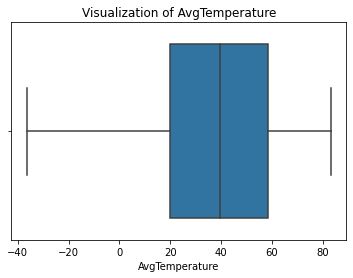

In [31]:
import seaborn as sns
# Plotting outliers
sns.boxplot(x=Regina['AvgTemperature'])
plt.title(f'Visualization of AvgTemperature')
plt.show()

In [32]:
avr_temp_summary=Regina['AvgTemperature']

In [33]:
# Removing outliers
Q1 = avr_temp_summary.quantile(0.25)
Q3 = avr_temp_summary.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extracted outliers
# outliers_df = Regina[(avr_temp_summary < lower_bound) | (avr_temp_summary > upper_bound)]


# Filtering outliers
Regina = Regina[(avr_temp_summary >= lower_bound) & (avr_temp_summary <= upper_bound)]


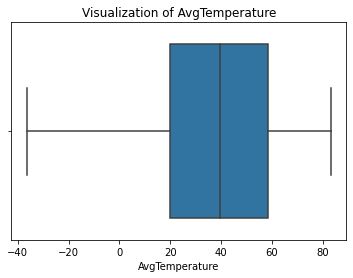

In [35]:
# Plotting after removing outliers
sns.boxplot(x=Regina['AvgTemperature'])
plt.title(f'Visualization of AvgTemperature')
plt.show()

In [37]:
Regina.describe()

,Month,Day,Year,AvgTemperature
count,9266.000000,9266.000000,9266.000000,9266.000000
mean,6.468919,15.717354,2007.188215,37.238409
std,3.457327,8.801516,7.325356,24.138896
min,1.000000,1.000000,1995.000000,-36.500000
25%,3.000000,8.000000,2001.000000,19.700000
50%,6.000000,16.000000,2007.000000,39.500000
75%,9.000000,23.000000,2014.000000,58.300000
max,12.000000,31.000000,2020.000000,83.200000


In [38]:
#pltting function that we send our series to
def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temprature")
    plt.grid(True)

Plotting the timeseries for the entire duration

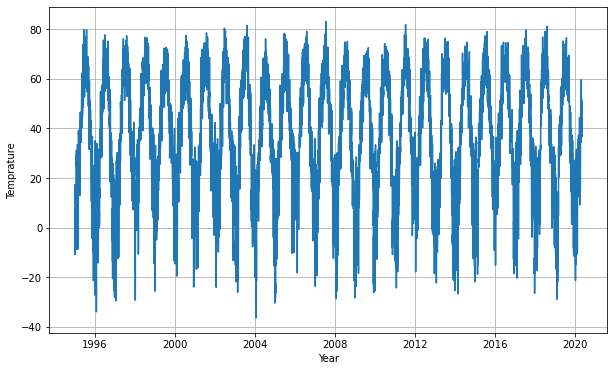

In [40]:
#converting data to list then numpy array object to get the ability to manipulate on them
time_step = Regina["Time_steps"].tolist()
temprature = Regina["AvgTemperature"].tolist()

series = np.array(temprature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

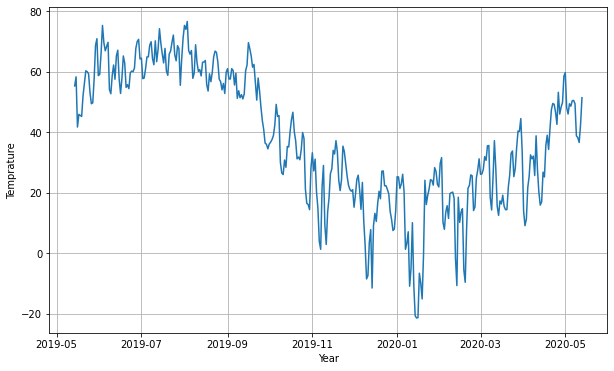

In [16]:
#plotting the data of one year by walking 365 step backword
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

In [42]:
#splitting our data into 80% training and 20% validation
split_index = int(len(series) * 0.8)
time_train = time[:split_index]
x_train = series[:split_index]
time_valid = time[split_index:]
x_valid = series[split_index:]

# Naive forecast

In naive forecast, we will take the record in month - 1 (the month previously) and assume that it will be carried forward for the next observation also.

In [44]:
#applying naive forecast to be as performance meaurant later
#subtracting each value from the previous one
naive_forecast = series[split_index - 1:-1]

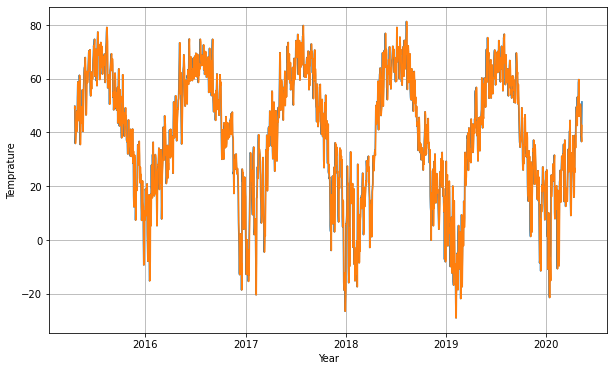

In [45]:
#plotting naive forecast and validation data together to compare
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

Since the plot above is so crowded, we will take for a small section of the dataset and visualize it.

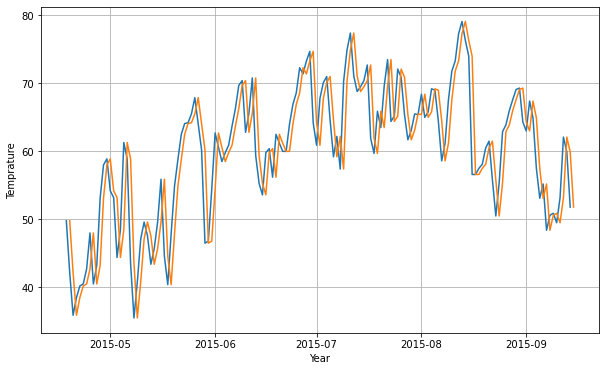

In [46]:
#Zoom in and see only few points
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [47]:
#showing mse and mae for naive forecast
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

47.57108953613808
5.188565264293419


# Moving average forecast

In moving average forecast, we will take the value of average for the previous window period and take it as the prediction for the next period.

In [48]:
'''applying mva by reading data and getting the mean value 
for each n samples which equale to (window size)'''

def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

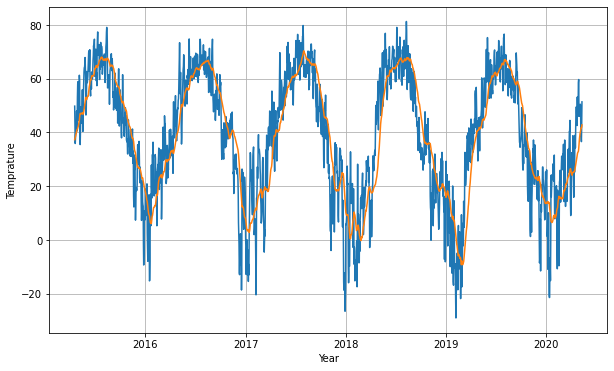

In [50]:
#passing the parameter to moving_avg function (series, and 30 window size)
moving_avg = moving_average_forecast(series, 30)[split_index - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [51]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

130.75306217787366
8.896125494426466


## Differencing

We will use a technique called differencing to remove the trend and seasonality from the data. 
Here we difference the data between what the value was 365 days (1 year back). The differencing should always follow the seasonal pattern. 

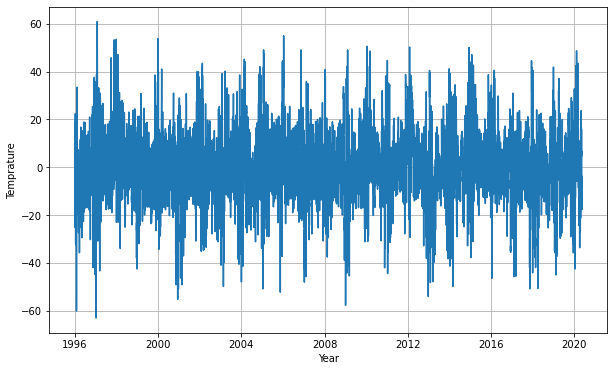

In [52]:
#differencing is by subtracting each previous 365 step value to remove the yearly trend
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

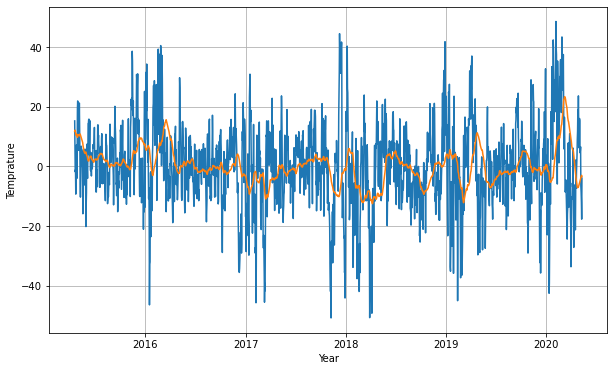

In [53]:
''''combining both the effect of moving average and differencing 
by passing the new differnced data as a parameter to moving avergae function'''
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_index - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_index - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

## Restoring trend and seasonality
But these are just the forecast of the differenced timeseries. To get the value for the original timeseries, we have to add back the value of t-365

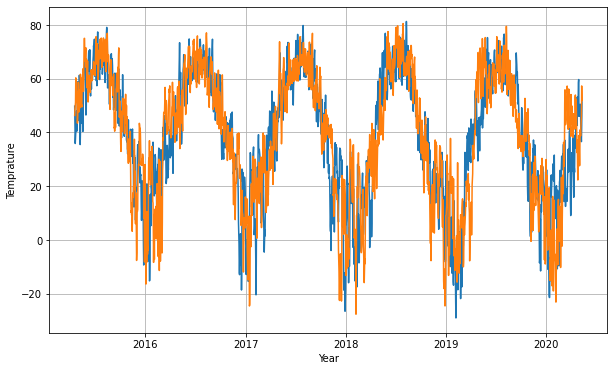

In [54]:
''''restoring seasonality after mva by stepping t-365 
(negative of negative is positive)'''
diff_moving_avg_plus_past = series[split_index - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [55]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

209.47198686084138
11.139404530744336


## Smoothing with moving average again

The above plot has a lot of noise. To smooth it again, we do a moving average on that

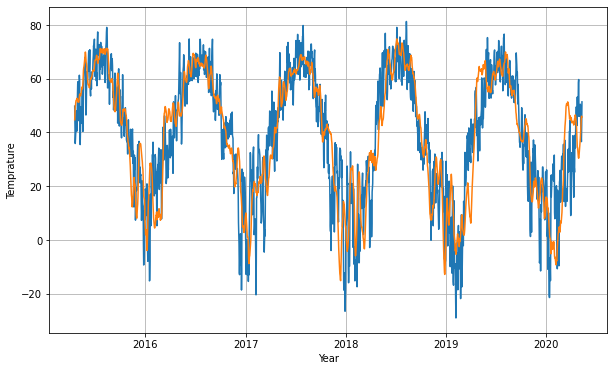

In [56]:
''''smoothing using mva with small step size to detect noises and remove them  but
when applied on large frame, it is used 
 for extracting some relationship on long-term memory)'''
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_index - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [57]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

163.99733365695795
9.877029126213591


# How to prepare a window dataset?

A window dataset is used in the dataset prepration of the tensorflow. It yields a prefetched dataset with the x and y variables as tensors. 

### Step 1: Converting the numpy array into a tensor using tensor_slices

In [58]:
#converting numpy into tensorflow slices
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())


[3.]
[7.8]
[-6.9]
[-10.9]
[-2.6]
[2.4]
[6.3]
[5.2]
[2.]
[9.5]
[17.4]
[12.7]
[9.6]
[11.4]
[11.9]
[11.2]
[9.1]
[5.7]
[0.]
[9.3]


### Step 2: tf window option groups 5 (window size) into a single line

But for the last observations for which there are no observations to group will be kept as remaining as in the outupt of this cell

In [59]:
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[3.] [7.8] [-6.9] [-10.9] [-2.6] 
[7.8] [-6.9] [-10.9] [-2.6] [2.4] 
[-6.9] [-10.9] [-2.6] [2.4] [6.3] 
[-10.9] [-2.6] [2.4] [6.3] [5.2] 
[-2.6] [2.4] [6.3] [5.2] [2.] 
[2.4] [6.3] [5.2] [2.] [9.5] 
[6.3] [5.2] [2.] [9.5] [17.4] 
[5.2] [2.] [9.5] [17.4] [12.7] 
[2.] [9.5] [17.4] [12.7] [9.6] 
[9.5] [17.4] [12.7] [9.6] [11.4] 
[17.4] [12.7] [9.6] [11.4] [11.9] 
[12.7] [9.6] [11.4] [11.9] [11.2] 
[9.6] [11.4] [11.9] [11.2] [9.1] 
[11.4] [11.9] [11.2] [9.1] [5.7] 
[11.9] [11.2] [9.1] [5.7] [0.] 
[11.2] [9.1] [5.7] [0.] [9.3] 
[9.1] [5.7] [0.] [9.3] 
[5.7] [0.] [9.3] 
[0.] [9.3] 
[9.3] 


### Step 3: Drop reminder set to True will drop the variables which are not having the grouping

In [60]:
dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[3.] [7.8] [-6.9] [-10.9] [-2.6] 
[7.8] [-6.9] [-10.9] [-2.6] [2.4] 
[-6.9] [-10.9] [-2.6] [2.4] [6.3] 
[-10.9] [-2.6] [2.4] [6.3] [5.2] 
[-2.6] [2.4] [6.3] [5.2] [2.] 
[2.4] [6.3] [5.2] [2.] [9.5] 
[6.3] [5.2] [2.] [9.5] [17.4] 
[5.2] [2.] [9.5] [17.4] [12.7] 
[2.] [9.5] [17.4] [12.7] [9.6] 
[9.5] [17.4] [12.7] [9.6] [11.4] 
[17.4] [12.7] [9.6] [11.4] [11.9] 
[12.7] [9.6] [11.4] [11.9] [11.2] 
[9.6] [11.4] [11.9] [11.2] [9.1] 
[11.4] [11.9] [11.2] [9.1] [5.7] 
[11.9] [11.2] [9.1] [5.7] [0.] 
[11.2] [9.1] [5.7] [0.] [9.3] 


### Step 4: flat map option will group the 5 observation in a single tensor variable

In [61]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[  3. ]
 [  7.8]
 [ -6.9]
 [-10.9]
 [ -2.6]]
[[  7.8]
 [ -6.9]
 [-10.9]
 [ -2.6]
 [  2.4]]
[[ -6.9]
 [-10.9]
 [ -2.6]
 [  2.4]
 [  6.3]]
[[-10.9]
 [ -2.6]
 [  2.4]
 [  6.3]
 [  5.2]]
[[-2.6]
 [ 2.4]
 [ 6.3]
 [ 5.2]
 [ 2. ]]
[[2.4]
 [6.3]
 [5.2]
 [2. ]
 [9.5]]
[[ 6.3]
 [ 5.2]
 [ 2. ]
 [ 9.5]
 [17.4]]
[[ 5.2]
 [ 2. ]
 [ 9.5]
 [17.4]
 [12.7]]
[[ 2. ]
 [ 9.5]
 [17.4]
 [12.7]
 [ 9.6]]
[[ 9.5]
 [17.4]
 [12.7]
 [ 9.6]
 [11.4]]
[[17.4]
 [12.7]
 [ 9.6]
 [11.4]
 [11.9]]
[[12.7]
 [ 9.6]
 [11.4]
 [11.9]
 [11.2]]
[[ 9.6]
 [11.4]
 [11.9]
 [11.2]
 [ 9.1]]
[[11.4]
 [11.9]
 [11.2]
 [ 9.1]
 [ 5.7]]
[[11.9]
 [11.2]
 [ 9.1]
 [ 5.7]
 [ 0. ]]
[[11.2]
 [ 9.1]
 [ 5.7]
 [ 0. ]
 [ 9.3]]


### Step 5: map option will split the variables into X and y variables

In [62]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[  3. ]
 [  7.8]
 [ -6.9]
 [-10.9]] [[-2.6]]
[[  7.8]
 [ -6.9]
 [-10.9]
 [ -2.6]] [[2.4]]
[[ -6.9]
 [-10.9]
 [ -2.6]
 [  2.4]] [[6.3]]
[[-10.9]
 [ -2.6]
 [  2.4]
 [  6.3]] [[5.2]]
[[-2.6]
 [ 2.4]
 [ 6.3]
 [ 5.2]] [[2.]]
[[2.4]
 [6.3]
 [5.2]
 [2. ]] [[9.5]]
[[6.3]
 [5.2]
 [2. ]
 [9.5]] [[17.4]]
[[ 5.2]
 [ 2. ]
 [ 9.5]
 [17.4]] [[12.7]]
[[ 2. ]
 [ 9.5]
 [17.4]
 [12.7]] [[9.6]]
[[ 9.5]
 [17.4]
 [12.7]
 [ 9.6]] [[11.4]]
[[17.4]
 [12.7]
 [ 9.6]
 [11.4]] [[11.9]]
[[12.7]
 [ 9.6]
 [11.4]
 [11.9]] [[11.2]]
[[ 9.6]
 [11.4]
 [11.9]
 [11.2]] [[9.1]]
[[11.4]
 [11.9]
 [11.2]
 [ 9.1]] [[5.7]]
[[11.9]
 [11.2]
 [ 9.1]
 [ 5.7]] [[0.]]
[[11.2]
 [ 9.1]
 [ 5.7]
 [ 0. ]] [[9.3]]


### Step 6: shuffle option will shuffle the dataset into random order.

Till the previous step, the observation would have been in the correct order. the shuffle will ensure that the data are randomly mixed up

In [63]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[-2.6]
 [ 2.4]
 [ 6.3]
 [ 5.2]] [[2.]]
[[ 5.2]
 [ 2. ]
 [ 9.5]
 [17.4]] [[12.7]]
[[ 9.5]
 [17.4]
 [12.7]
 [ 9.6]] [[11.4]]
[[17.4]
 [12.7]
 [ 9.6]
 [11.4]] [[11.9]]
[[  3. ]
 [  7.8]
 [ -6.9]
 [-10.9]] [[-2.6]]
[[-10.9]
 [ -2.6]
 [  2.4]
 [  6.3]] [[5.2]]
[[2.4]
 [6.3]
 [5.2]
 [2. ]] [[9.5]]
[[12.7]
 [ 9.6]
 [11.4]
 [11.9]] [[11.2]]
[[6.3]
 [5.2]
 [2. ]
 [9.5]] [[17.4]]
[[11.2]
 [ 9.1]
 [ 5.7]
 [ 0. ]] [[9.3]]
[[11.4]
 [11.9]
 [11.2]
 [ 9.1]] [[5.7]]
[[  7.8]
 [ -6.9]
 [-10.9]
 [ -2.6]] [[2.4]]
[[ 2. ]
 [ 9.5]
 [17.4]
 [12.7]] [[9.6]]
[[ -6.9]
 [-10.9]
 [ -2.6]
 [  2.4]] [[6.3]]
[[ 9.6]
 [11.4]
 [11.9]
 [11.2]] [[9.1]]
[[11.9]
 [11.2]
 [ 9.1]
 [ 5.7]] [[0.]]


### Step 7: Batch option will put the variables into mini-batches suitable for training. It will group both X and y into mini batches

In [64]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

x =  [[[ 2. ]
  [ 9.5]
  [17.4]
  [12.7]]

 [[-2.6]
  [ 2.4]
  [ 6.3]
  [ 5.2]]]
y =  [[[9.6]]

 [[2. ]]]
*************************
x =  [[[ -6.9]
  [-10.9]
  [ -2.6]
  [  2.4]]

 [[ 12.7]
  [  9.6]
  [ 11.4]
  [ 11.9]]]
y =  [[[ 6.3]]

 [[11.2]]]
*************************
x =  [[[ 9.5]
  [17.4]
  [12.7]
  [ 9.6]]

 [[17.4]
  [12.7]
  [ 9.6]
  [11.4]]]
y =  [[[11.4]]

 [[11.9]]]
*************************
x =  [[[11.9]
  [11.2]
  [ 9.1]
  [ 5.7]]

 [[ 9.6]
  [11.4]
  [11.9]
  [11.2]]]
y =  [[[0. ]]

 [[9.1]]]
*************************
x =  [[[ 11.4]
  [ 11.9]
  [ 11.2]
  [  9.1]]

 [[  7.8]
  [ -6.9]
  [-10.9]
  [ -2.6]]]
y =  [[[5.7]]

 [[2.4]]]
*************************
x =  [[[  3. ]
  [  7.8]
  [ -6.9]
  [-10.9]]

 [[-10.9]
  [ -2.6]
  [  2.4]
  [  6.3]]]
y =  [[[-2.6]]

 [[ 5.2]]]
*************************
x =  [[[11.2]
  [ 9.1]
  [ 5.7]
  [ 0. ]]

 [[ 5.2]
  [ 2. ]
  [ 9.5]
  [17.4]]]
y =  [[[ 9.3]]

 [[12.7]]]
*************************
x =  [[[2.4]
  [6.3]
  [5.2]
  [2. ]]

 [[6.

Window size is how many observations in the past do you want to see before making a prediction.
Batch size is similar to mini-batches set while training the neural network

In [65]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [66]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    To create a window dataset given a numpy as input
    
    Returns: A prefetched tensorflow dataset
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

## Finding the correct learning rate

Using a call back for LearningRateScheduler(). For every epoch this just changes the learning rate a little so that the learning rate varies from 1e-8 to 1e-6

Also a new loss function Huber() is introduced which is less sensitive to outliers.

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400) #rescaling to see the output
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(7412,)
Epoch 1/100
29/29 [==============================] - 1s 43ms/step - loss: 27.1901 - mae: 27.6865 - lr: 1.0000e-08
Epoch 2/100
29/29 [==============================] - 1s 42ms/step - loss: 26.3027 - mae: 26.7989 - lr: 1.1220e-08
Epoch 3/100
29/29 [==============================] - 1s 41ms/step - loss: 25.4203 - mae: 25.9164 - lr: 1.2589e-08
Epoch 4/100
29/29 [==============================] - 1s 42ms/step - loss: 24.5340 - mae: 25.0299 - lr: 1.4125e-08
Epoch 5/100
29/29 [==============================] - 1s 41ms/step - loss: 23.6011 - mae: 24.0970 - lr: 1.5849e-08
Epoch 6/100
29/29 [==============================] - 1s 43ms/step - loss: 22.5353 - mae: 23.0307 - lr: 1.7783e-08
Epoch 7/100
29/29 [==============================] - 1s 42ms/step - loss: 21.3126 - mae: 21.8075 - lr: 1.9953e-08
Epoch 8/100
29/29 [==============================] - 1s 42ms/step - loss: 20.0319 - mae: 20.5259 - l

We plot this on a semilog axis

(1e-08, 0.0001, 0.0, 60.0)

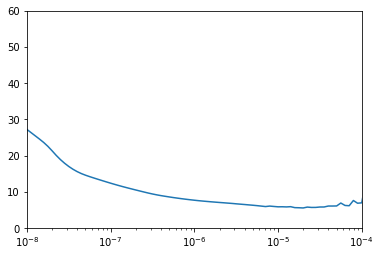

In [68]:
#حplotting the lr on logatitmic visualization
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

We take the step where the learning rate drops the steepest to train our neural network.

In [69]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True),
  tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
74/74 [==============================] - 1s 19ms/step - loss: 18.9167 - mae: 19.4085
Epoch 2/500
74/74 [==============================] - 1s 19ms/step - loss: 15.8807 - mae: 16.3709
Epoch 3/500
74/74 [==============================] - 2s 21ms/step - loss: 14.6232 - mae: 15.1130
Epoch 4/500
74/74 [==============================] - 1s 19ms/step - loss: 13.7997 - mae: 14.2890
Epoch 5/500
74/74 [==============================] - 1s 19ms/step - loss: 13.1485 - mae: 13.6376
Epoch 6/500
74/74 [==============================] - 1s 19ms/step - loss: 12.5578 - mae: 13.0466
Epoch 7/500
74/74 [==============================] - 1s 19ms/step - loss: 12.0373 - mae: 12.5256
Epoch 8/500
74/74 [==============================] - 1s 19ms/step - loss: 11.6482 - mae: 12.1364
Epoch 9/500
74/74 [==============================] - 1s 19ms/step - loss: 11.2991 - mae: 11.7872
Epoch 10/500
74/74 [==============================] - 2s 22ms/step - loss: 11.0044 - mae: 11.4923
Epoch 11/500
74/74 [=========

In [70]:
def model_forecast(model, series, window_size):
    """
    Given a model object and a series for it to predict, this function will return the prediction
    """
    ds = tf.data.Dataset.from_tensor_slices(series)
    #drop remainder=true means that we drop any non equal rem steps to our window size
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1) 
    forecast = model.predict(ds)
    return forecast

In [71]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_index - window_size:-1, -1, 0]

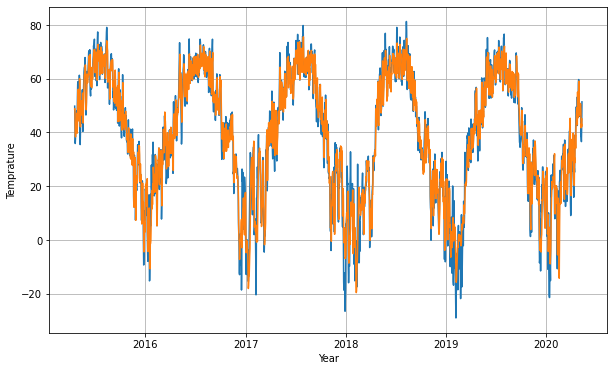

In [72]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [73]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5.323775

<Figure size 432x288 with 0 Axes>

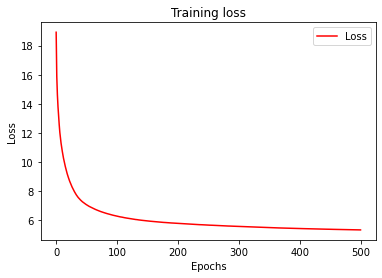

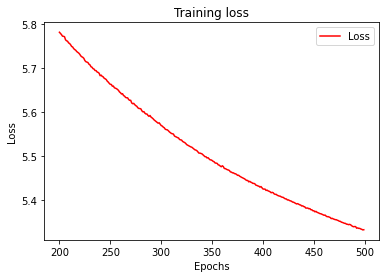

<Figure size 432x288 with 0 Axes>

In [75]:
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [78]:
# printing the predicted and actual numbers together
data = {'Date': time_valid, 'Actual': x_valid, 'Predicted': rnn_forecast}
comparison_df = pd.DataFrame(data)
comparison_df.head()

,Date,Actual,Predicted
0,2015-04-18,49.8,48.810387
1,2015-04-19,42.2,48.775227
2,2015-04-20,35.9,40.205570
3,2015-04-21,38.5,38.338768
4,2015-04-22,40.2,41.770054
